In [1]:
import numpy as np
from sklearn.datasets import load_iris 
iris = load_iris() 
X = iris.data.astype(np.float32) 
y_true = iris.target.astype(np.int32)

In [2]:
from sklearn.preprocessing import OneHotEncoder

y_onehot = OneHotEncoder().fit_transform(y_true.reshape(-1, 1))
y_onehot = y_onehot.astype(np.int64).todense()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=14)

In [4]:
input_layer_size, hidden_layer_size, output_layer_size = 4, 6, 3

In [5]:
from keras.layers import Dense
from keras.models import Sequential
hidden_layer = Dense(output_dim=hidden_layer_size, input_dim=input_layer_size, activation='relu')
output_layer = Dense(output_layer_size, activation='sigmoid')

Using TensorFlow backend.
C:\Users\Shaarif\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, activation="relu", units=6)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
model = Sequential(layers=[hidden_layer, output_layer])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
112/112 [==============================] - 0s 1ms/step - loss: 0.3142 - acc: 0.3661
Epoch 2/10
112/112 [==============================] - 0s 54us/step - loss: 0.3117 - acc: 0.3661
Epoch 3/10
112/112 [==============================] - 0s 58us/step - loss: 0.3089 - acc: 0.3571
Epoch 4/10
112/112 [==============================] - 0s 76us/step - loss: 0.3063 - acc: 0.3571
Epoch 5/10
112/112 [==============================] - 0s 90us/step - loss: 0.3037 - acc: 0.3571
Epoch 6/10
112/112 [==============================] - 0s 81us/step - loss: 0.3011 - acc: 0.3482
Epoch 7/10
112/112 [==============================] - 0s 71us/step - loss: 0.2986 - acc: 0.3482
Epoch 8/10
112/112 [==============================] - 0s 89us/step - loss: 0.2960 - acc: 0.3482
Epoch 9/10
112/112 [==============================] - 0s 81us/step - loss: 0.2935 - acc: 0.3482
Epoch 10/10
112/112 [==============================] - 0s 81us/step - loss: 0.2910 - acc: 0.3482


In [8]:
history.history

{'acc': [0.36607142857142855,
  0.36607142857142855,
  0.35714285714285715,
  0.35714285714285715,
  0.35714285714285715,
  0.3482142857142857,
  0.3482142857142857,
  0.3482142857142857,
  0.3482142857142857,
  0.3482142857142857],
 'loss': [0.31424868106842041,
  0.3116821902138846,
  0.30891431655202595,
  0.3062966891697475,
  0.30372565984725952,
  0.30111001644815716,
  0.2985675207206181,
  0.29602088247026714,
  0.29346677235194613,
  0.29098221233912874]}

In [9]:
%matplotlib inline

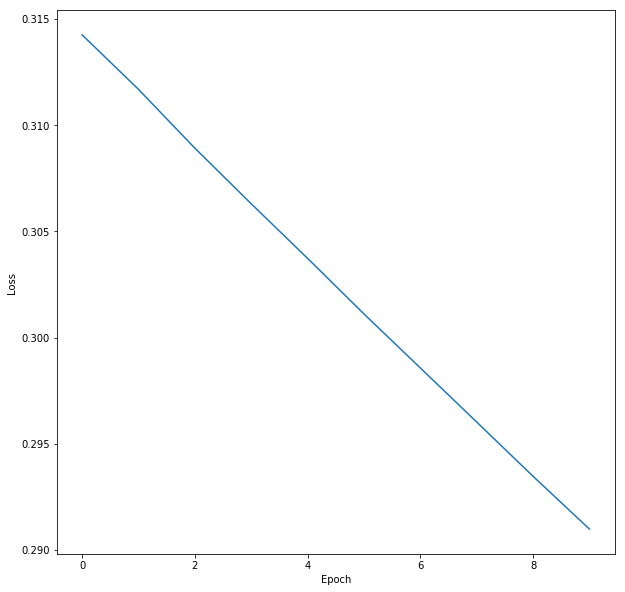

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("keras_on_iris_one.png")

In [11]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        17
          1       0.00      0.00      0.00        13
          2       0.19      0.88      0.31         8

avg / total       0.04      0.18      0.07        38



C:\Users\Shaarif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
history = model.fit(X_train, y_train, epochs=1000, verbose=False)

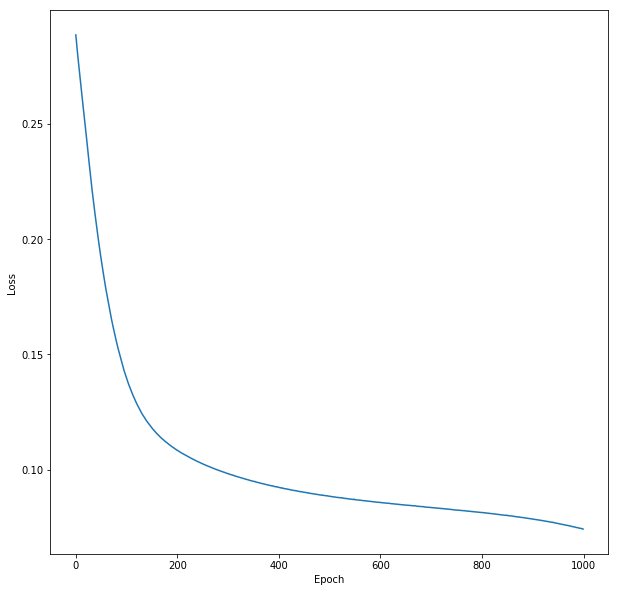

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("keras_on_iris_one-2.png")

In [14]:
y_pred = model.predict(X_test)
y_pred = model.predict_classes(X_test)
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        38

